# Packages

In [1]:
import pandas as pd
import numpy as np
import sklearn
import random
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import matplotlib
import matplotlib.pyplot as plt

# Data Aqcuisition

In [2]:
#filePathData = "G:\\Other computers\\Gir\\Wormhole\\Fall2024\\MachineLearning\\FinalProject\\sample_data_for_project_final.csv"
#filePathMeta = "G:\\Other computers\\Gir\\Wormhole\\Fall2024\\MachineLearning\\FinalProject\\sample_metadata_for_project_final.csv"

filePathData = "C:\\Users\\Jacob\\Desktop\\Wormhole\\Fall2024\\MachineLearning\\FinalProject\\sample_data_for_project_final.csv"
filePathMeta = "C:\\Users\\Jacob\\Desktop\\Wormhole\\Fall2024\\MachineLearning\\FinalProject\\sample_metadata_for_project_final.csv"

arrayData = pd.read_csv(filePathData)
arrayMeta = pd.read_csv(filePathMeta)
arrayData = pd.DataFrame.transpose(arrayData)

arrayAllData = arrayMeta.merge(arrayData, left_on=arrayMeta["sample_name"], right_on=arrayData.index)
arrayAllData = arrayAllData.drop("key_0", axis=1)
arrayAllData = arrayAllData.drop("sample_name", axis=1)

numpyAllData = arrayAllData.to_numpy()
numpyAllData = numpyAllData.astype(float)

#arrayAllData
numpyAllData

array([[0.00000000e+00, 1.33557109e+05, 2.91432288e+08, ...,
        3.50969300e+03, 1.36564096e+02, 1.36564096e+02],
       [1.00000000e+00, 4.06777188e+05, 2.05820016e+08, ...,
        6.33860200e+03, 2.79927600e+03, 1.36564096e+02],
       [0.00000000e+00, 4.65363813e+05, 1.57209296e+08, ...,
        9.57411500e+03, 6.29698700e+03, 1.36564096e+02],
       ...,
       [1.00000000e+00, 3.53288781e+05, 1.37888112e+08, ...,
        1.36564096e+02, 1.36564096e+02, 3.40627000e+03],
       [0.00000000e+00, 5.97924688e+05, 1.29187984e+08, ...,
        1.36564096e+02, 9.19465100e+03, 1.36564096e+02],
       [1.00000000e+00, 4.93123719e+05, 1.42123024e+08, ...,
        1.36564096e+02, 5.40593100e+03, 7.93992500e+03]])

# Normalize

In [3]:
scaler = StandardScaler()
scaler.fit(numpyAllData[:, 1:])
numpyAllData[:, 1:] = scaler.transform(numpyAllData[:, 1:])

numpyAllDataNorm = numpyAllData
numpyAllData = arrayAllData.to_numpy()

# PCA

### PCA Object

In [4]:
class PCA:

    # Initialize and fit data
    def __init__(self, data, nDimension):
        self.data = data
        self.nDimension = nDimension
        self.mean = np.mean(data, axis = 0)
        self.meanCenteredData = self.meanCenter()
        self.cov = self.covariance()
        self.eigenvectors, self.eigenvalues = self.eigen()
        self.principleComponents = self.eigenvectors[0:self.nDimension]

    # Determine covariance matrix
    def covariance(self):
        return np.cov(self.meanCenteredData.T)

    # Determine and order eigenvalues and eigenvectors
    def eigen(self):
        values, vector = np.linalg.eig(self.cov)
        
        vector = vector.T
        values = values[np.argsort(values)[::-1]]
        vector = vector[np.argsort(values)[::-1]]

        return vector, values

    # Mean center the data
    def meanCenter(self):
        return self.data - self.mean

    # Project principle component vectors onto data
    def project(self):
        return np.dot(self.meanCenteredData, self.principleComponents.T)
    
    def varianceRatio(self):
        return ((self.eigenvalues / self.eigenvalues.sum()) * 100).astype(float)


### Run PCA 
(this takes a while)

In [ ]:
pcaResults = PCA(numpyAllDataNorm[:, 1:], 100)

C:\Users\Jacob\AppData\Local\Temp\ipykernel_8000\2215632166.py:36: ComplexWarning: Casting complex values to real discards the imaginary part
  return ((self.eigenvalues / self.eigenvalues.sum()) * 100).astype(float)


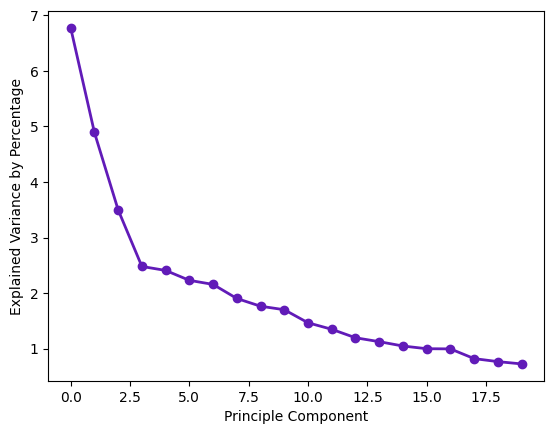

In [124]:
pcaProj = pcaResults.project()

# Eigenvalue = variance
x = np.arange(len(pcaResults.eigenvalues[0:20]))

# Scree plot
ratios = pcaResults.varianceRatio()
plt.plot(x[0:20], ratios[0:20], 'o-', linewidth=2, color='#611bb8')
plt.xlabel("Principle Component")
plt.ylabel("Explained Variance by Percentage")
plt.show()

c:\Users\Jacob\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Jacob\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\collections.py:197: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


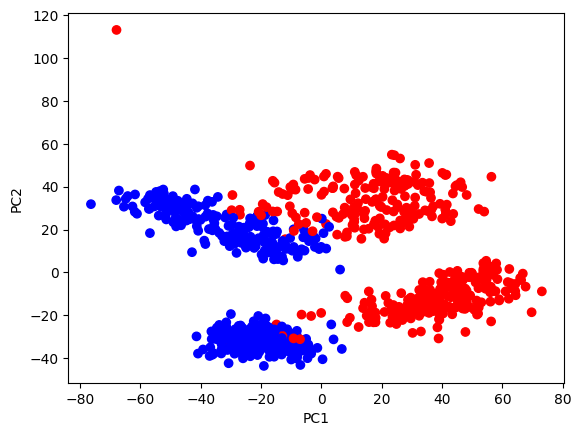

In [7]:
x1 = pcaProj[:, 0]
x2 = pcaProj[:, 1]

plt.scatter(x1, x2, c=arrayAllData["sample_label"], cmap="bwr")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

### Sci kit PCA

In [127]:
skPCA = sklearn.decomposition.PCA(n_components=100)

skPCA.fit(numpyAllDataNorm[:, 1:])

PCA(n_components=100)

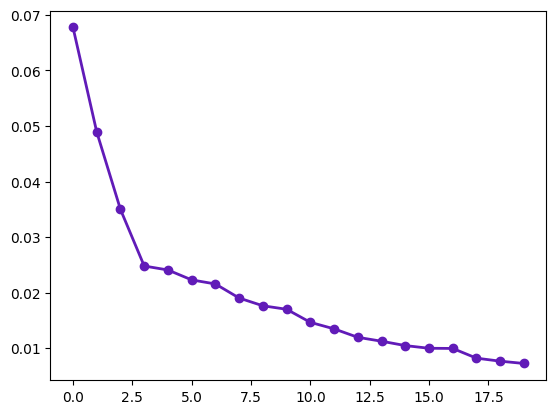

In [129]:
# Scree plot
skratios = skPCA.explained_variance_ratio_
plt.plot(np.arange(20), skratios[0:20], 'o-', linewidth=2, color='#611bb8')
plt.show()

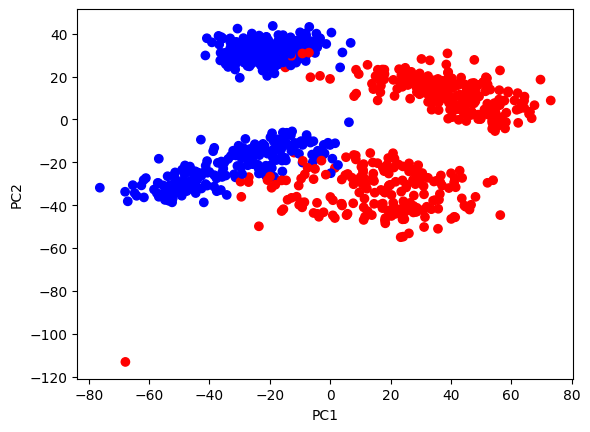

In [9]:
skx = skPCA.transform(numpyAllDataNorm[:, 1:])

skx1 = skx[:, 0]
skx2 = skx[:, 1]

plt.scatter(skx1, skx2, c=arrayAllData["sample_label"], cmap="bwr")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# Linear Regression

### Linear regression object

In [106]:
class SimpleLinearAnalytical:

    ################################################## Mathematical Operations

    # Finds the average of a list of numbers
    def average(numbers):
        return sum(numbers)/len(numbers)
    
    # Determines beta1 using x and y data
    def calcBetaOne(self):
        sumNum = 0
        sumDen = 0
        
        # Summation(xi - xAverage)(yi - yAverage)
        for i in range(len(self.xData)):
            sumNum += ((self.xData[i] - self.xMean)*(self.yData[i] - self.yMean))

        # Summation(xi - xAverage)^2
        for i in range(len(self.xData)):
            sumDen += ((self.xData[i] - self.xMean) ** 2)

        return sumNum/sumDen
    
    # Uses calculated y-intercept and slope to determine y-values 
    def runFunction(self, xValues):
        
        outputList = []

        for x in xValues:
            outputList.append(self.betaZero + (self.betaOne * x))
        
        return outputList

    ################################################## Class Methods
    
    # Each value for the simple linear regression is calculated upon initialization
    def __init__(self, xData, yData):
        
        if len(xData) != len(yData):
            raise Exception("X and Y data must have an equal number of data points")
        
        #if type(xData) is not list or type(yData) is not list:
        #    print(type(xData))
        #    print(type(yData))
        
        self.xData = xData
        self.yData = yData
        
        self.xMean = SimpleLinearAnalytical.average(xData)
        self.yMean = SimpleLinearAnalytical.average(yData)

        self.betaOne = self.calcBetaOne()
        self.betaZero = self.yMean - (self.betaOne * self.xMean)

    def __str__(self):
        return "Beta1 and Beta0 were determined resulting in the following equation: y = " + str(self.betaZero) + " + " + str(self.betaOne) + "x"

### Run Linear Regression

In [147]:
temp = numpyAllDataNorm[:, 1:2001]
counter = 0

scoreList = []

for x in range(0, len(temp[0])):
    for y in range(x + 1, len(temp[0])):
        
        model = SimpleLinearAnalytical(temp[:, x].tolist(), temp[:, y].tolist())
        prediction = model.runFunction(model.xData)
        determination = r2_score(temp[:, y].reshape(-1, 1), prediction)        
        if determination > 0.8:
            counter += 1
            scoreList.append(determination)
            """
            plt.scatter(temp[:, x], temp[:, y])
            plt.title("Linear Regression With R^2 of " + str(determination))
            plt.ylabel("PC " + str(y + 1))
            plt.xlabel("PC " + str(x + 1))
            plt.show()
            """
    print(str(x) + " done!")

counter

0 done!
1 done!
2 done!
3 done!
4 done!
5 done!
6 done!
7 done!
8 done!
9 done!
10 done!
11 done!
12 done!
13 done!
14 done!
15 done!
16 done!
17 done!
18 done!
19 done!
20 done!
21 done!
22 done!
23 done!
24 done!
25 done!
26 done!
27 done!
28 done!
29 done!
30 done!
31 done!
32 done!
33 done!
34 done!
35 done!
36 done!
37 done!
38 done!
39 done!
40 done!
41 done!
42 done!
43 done!
44 done!
45 done!
46 done!
47 done!
48 done!
49 done!
50 done!
51 done!
52 done!
53 done!
54 done!
55 done!
56 done!
57 done!
58 done!
59 done!
60 done!
61 done!
62 done!
63 done!
64 done!
65 done!
66 done!
67 done!
68 done!
69 done!
70 done!
71 done!
72 done!
73 done!
74 done!
75 done!
76 done!
77 done!
78 done!
79 done!
80 done!
81 done!
82 done!
83 done!
84 done!
85 done!
86 done!
87 done!
88 done!
89 done!
90 done!
91 done!
92 done!
93 done!
94 done!
95 done!
96 done!
97 done!
98 done!
99 done!
100 done!
101 done!
102 done!
103 done!
104 done!
105 done!
106 done!
107 done!
108 done!
109 done!
110 done!


3682

### Scikit Linear Regression

In [135]:
counter = 0
temp = numpyAllDataNorm[:, 1:2001]
skScoreList = []


for x in range(0, len(temp[0])):
    for y in range(x + 1, len(temp[0])):
        linReg = LinearRegression()
        linReg.fit(temp[:, x].reshape(-1, 1), temp[:, y].reshape(-1, 1))
        score = linReg.score(temp[:, x].reshape(-1, 1), temp[:, y].reshape(-1, 1))
        pred = linReg.predict(temp[:, x].reshape(-1, 1))
        r2Score = r2_score(temp[:, y].reshape(-1, 1), pred)
        if abs(r2Score) > 0.8:
            counter += 1
            skScoreList.append(r2Score)
            """
            plt.scatter(temp[:, x], temp[:, y])
            plt.title("Linear Regression With R^2 of " + str(score))
            plt.ylabel("PC " + str(y + 1))
            plt.xlabel("PC " + str(x + 1))
            plt.show()
            """
    print(str(x) + " done!")
counter


0 done!
1 done!
2 done!
3 done!
4 done!
5 done!
6 done!
7 done!
8 done!
9 done!
10 done!
11 done!
12 done!
13 done!
14 done!
15 done!
16 done!
17 done!
18 done!
19 done!
20 done!
21 done!
22 done!
23 done!
24 done!
25 done!
26 done!
27 done!
28 done!
29 done!
30 done!
31 done!
32 done!
33 done!
34 done!
35 done!
36 done!
37 done!
38 done!
39 done!
40 done!
41 done!
42 done!
43 done!
44 done!
45 done!
46 done!
47 done!
48 done!
49 done!
50 done!
51 done!
52 done!
53 done!
54 done!
55 done!
56 done!
57 done!
58 done!
59 done!
60 done!
61 done!
62 done!
63 done!
64 done!
65 done!
66 done!
67 done!
68 done!
69 done!
70 done!
71 done!
72 done!
73 done!
74 done!
75 done!
76 done!
77 done!
78 done!
79 done!
80 done!
81 done!
82 done!
83 done!
84 done!
85 done!
86 done!
87 done!
88 done!
89 done!
90 done!
91 done!
92 done!
93 done!
94 done!
95 done!
96 done!
97 done!
98 done!
99 done!
100 done!
101 done!
102 done!
103 done!
104 done!
105 done!
106 done!
107 done!
108 done!
109 done!
110 done!


3682

### R2 plot

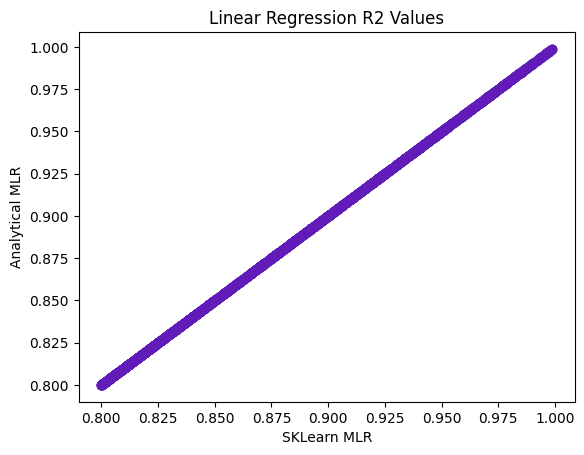

In [148]:
plt.scatter(skScoreList, scoreList, color="#611bb8")
plt.title("Linear Regression R2 Values")
plt.ylabel("Analytical MLR")
plt.xlabel("SKLearn MLR")
plt.show()

# Logistic Regression
Uses PCA transformed data

In [136]:
xData = skx[:, 0:5]
yData = numpyAllDataNorm[:, 0]
xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size=0.2)

### Logistic Regression Object

In [140]:
class LogReg:

    ################################################## Static Vars and Methods
    inputDataPoints = [[1, 2, 3, 4, 5, 6, 7]]
    outputDataPoints = [0, 0, 1, 1, 1, 0, 0]
    alpha = 0.01
    deltaJ = 0.00001

    # Changes alpha
    def changeAlpha(newAlpha):
        LogReg.alpha = float(newAlpha)

    # This method takes a list of lists. The outer list corresponds to dimensionality and represents data points.
    # Each sub list represent a point value for a single dimension
    def changeDataPoints(newInputDataPoints, newOutputDataPoints):
        if len(newInputDataPoints[0]) < 2:
            raise Exception("Data entered is not of sufficient length. Please enter a list of lists.")
        
        for x in range(len(newInputDataPoints)):
            if len(newInputDataPoints[x]) != len(newInputDataPoints[0]):
                raise Exception("Lists must have the same number of values.")
        
        if len(newInputDataPoints[0]) != len(newOutputDataPoints):
            raise Exception("Input data and output data must have the same number of data points.")

        LogReg.inputDataPoints = newInputDataPoints
        LogReg.outputDataPoints = newOutputDataPoints

    # Changes deltaJ
    def changeDeltaJ(newDeltaJ):
        LogReg.deltaJ = float(newDeltaJ)

    ################################################## Object manipulation
    # Changes value of theta
    def changeValue(self, newValue):
        self.thetaValue = newValue

    # Returns label of theta (theta0, theta1, theta2, etc.)
    def getLabel(self):
        return self.label
    
    # Returns numerical value of theta
    def getValue(self):
        return self.thetaValue

    # Using the dimensionality of the input data, this method creates the proper amount of theta variables and assigns them a random value
    def initializeThetaNumerical():
        tempList = []
        for x in range(len(LogReg.inputDataPoints) + 1):
            tempList.append(LogReg(random.uniform(-1, 1), x))
        return tempList

    ################################################## Mathematical Operations
    # Calculates a J value based on theta values and input/output data
    def calcJ(thetaList):
        totalSum = 0
        
        # Loop through xi/yi
        for i in range(len(LogReg.outputDataPoints)):
            tempCalc = 0
            
            # Loop through thetas (left to right within summation)
            for theta in thetaList:
                if theta.getLabel() == 0: # for theta0
                    tempCalc += theta.getValue()
                else:
                    tempCalc += theta.getValue() * LogReg.inputDataPoints[theta.getLabel() - 1][i]
            
            h = 1 / (1 + np.exp(-tempCalc))
            totalSum += (LogReg.outputDataPoints[i] * np.log(h + 1e-15)) + ((1 - LogReg.outputDataPoints[i]) * np.log(1 - h + 1e-15))
        
        return totalSum/(len(LogReg.outputDataPoints))

    # This is the main method for the mathematics section, as it calls the other ones
    # This method performs a gradient descent using an input list of initialized theta values and the input/outputdatapoints
    def gradientDescent(thetaList, debug=False):
        iteration = 1
        continueCalc = True
        oldJ = None
        
        # Loops until deltaJ specification
        while continueCalc:
            derivativeList = []
            
            # Take the partial derivative of each theta value
            for theta in thetaList:
                if theta.getLabel() == 0:
                    derivativeList.append(LogReg.thetaZeroDerivative(thetaList))
                else:
                    derivativeList.append(LogReg.thetaStandardDerivative(theta, thetaList))

            # Apply alpha and partial derivative to current theta
            thetaList = LogReg.updateThetaNumerical(thetaList, derivativeList)

            # Calculate and check j
            j = LogReg.calcJ(thetaList)
            if oldJ != None and abs(j - oldJ) < LogReg.deltaJ:
                continueCalc = False
            else:
                oldJ = j
            
            if debug == True:
                print("Iteration " + str(iteration) + ", theta values: ")
                for x in thetaList:
                    print(x)

                print("J has a value of " + str(j))
                iteration += 1
        
        return thetaList

    # Takes a list of theta and calculates corresponding theoretical value with input data
    def runFunction(thetaList):
        
        predictedValues = []

        # Ensures that the the number of thetas is supported by the dataset
        if len(thetaList) != len(LogReg.inputDataPoints) + 1:
            raise Exception("Theta list is not of sufficient length. Please ensure the the number of theta entries is the same as the dimensionality of the input data")
        
        # Isolate theta0 and remove it from the main list
        thetaZero = thetaList[0]
        thetaList.pop(0)

        # Calculation for a given point
        for dataPoint in range(len(LogReg.inputDataPoints[0])):
            theoreticalValue = thetaZero.getValue()
            for dimension in range(len(LogReg.inputDataPoints)):
                theoreticalValue += LogReg.inputDataPoints[dimension][dataPoint] * (thetaList[dimension]).getValue()
            
            predictedValues.append(1 / (1 + np.exp(-theoreticalValue)))
            #print("at data point " + str(dataPoint) + " the theoretical value is " + str(predictedValues[-1]))

        
        return predictedValues

    # Takes the partial derivative of entered theta value (any except for theta0)
    def thetaStandardDerivative(inputThetaNumerical, thetaList):
        totalSum = 0
        
        # Loop through xi/yi
        for i in range(len(LogReg.outputDataPoints)):
            tempCalc = 0
            
            # Loop through thetas (left to right within summation)
            for theta in thetaList:
                if theta.getLabel() == 0:
                    tempCalc += theta.getValue()
                else:
                    tempCalc += theta.getValue() * LogReg.inputDataPoints[theta.getLabel() - 1][i]

            h = 1 / (1 + np.exp(-tempCalc))
            totalSum += (h - LogReg.outputDataPoints[i]) * LogReg.inputDataPoints[inputThetaNumerical.getLabel() - 1][i]
        
        return totalSum/len(LogReg.outputDataPoints)

    # Takes the partial derivative of entered theta value (any except for theta0)
    # Same as the StandardDerivative method but without multiplying by xi before summation
    def thetaZeroDerivative(thetaList):
        totalSum = 0
        
        # Loop through xi/yi
        for i in range(len(LogReg.outputDataPoints)):
            tempCalc = 0

            # Loop through thetas (left to right within summation)
            for theta in thetaList:
                if theta.getLabel() == 0:
                    totalSum += theta.getValue()
                else:
                    tempCalc += theta.getValue() * LogReg.inputDataPoints[theta.getLabel() - 1][i]

            h = 1 / (1 + np.exp(-tempCalc))
            totalSum += (h - LogReg.outputDataPoints[i])
        
        return (totalSum)/len(LogReg.outputDataPoints)

    # This method is most relevant with gradient descent, updating the list of theta objects with new calculated values
    # This is done following derivative calculation as to not mess up the derivative calculations for sequential theta values
    def updateThetaNumerical(thetaList, derivativeList):
        for i in range(len(thetaList)):
            thetaList[i].changeValue(thetaList[i].getValue() - (LogReg.alpha * derivativeList[i]))
        return thetaList

    ################################################## Class Methods
    def __init__(self, theta, label):
        self.thetaValue = float(theta)
        self.label = label

    def __str__(self):
        return "theta" + str(self.label) + " has a value of " + str(self.thetaValue)

def average(numbers):
    return (sum(numbers)/len(numbers))

def rSquared(predictionList, actualList):
    if len(predictionList) != len(actualList):
        raise Exception("Prediction list and actual data list must be of the same length.")

    sumNum = 0
    sumDen = 0
    mean = average(actualList)
    
    for i in range(len(actualList)):
        sumNum += (actualList[i] - predictionList[i]) ** 2
        sumDen += (actualList[i] - mean) ** 2
    
    return (1 - (sumNum/sumDen))



### Run Logistic Regression

In [143]:
xListTrain = xTrain.T.tolist()
yListTrain = np.ravel(yTrain).tolist()

xListTest = xTest.T.tolist()
yListTest = np.ravel(yTest).tolist()

# Perform MLR (alpha = 0.01, deltaJ = 0.01)
LogReg.changeDataPoints(xListTrain, yListTrain)
thetaList = LogReg.initializeThetaNumerical()
newThetaList = LogReg.gradientDescent(thetaList, debug=False) # Set to false if you don't care to see intermittent values

# Print thetas
#for x in newThetaList:
#    print(x)


# Calculate and print prediction values
LogReg.changeDataPoints(xListTest, yListTest)
predictedValues = LogReg.runFunction(thetaList)

# Calculate and print r^2
determination = rSquared(predictedValues, yListTest)
print("The model produced an R^2 of: " + str(determination))


The model produced an R^2 of: 0.9400958682786467


### Sci Kit Logistic Regression

In [142]:
skLogReg = LogisticRegression()
skLogReg.fit(xTrain, yTrain)

print(skLogReg.predict(xTest))
print(yTest)
print("The model produced an R^2 of: " + str(skLogReg.score(xTest, yTest)))

[1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1.
 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0.
 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0.
 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1.
 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1.
 0. 0. 1. 1. 0.]
[1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1.
 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0.
 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0.
 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1.
 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 

# Artificial Neural Network

### ANN Object

In [144]:
class ArtificialNeuralNetwork:
    
    def __init__(self, inputTrainingData, targetTrainingData, hiddenLayer, alpha=0.1):
        self.inputTrainingData = inputTrainingData
        self.targetTrainingData = targetTrainingData
        
        # Maybe integrate more dynamically?
        self.layer1Weights = ArtificialNeuralNetwork.initializeWeights(len(inputTrainingData[0]), hiddenLayer)
        self.layer2Weights = ArtificialNeuralNetwork.initializeWeights(hiddenLayer, len(targetTrainingData[0]))

        self.layer1Bias = ArtificialNeuralNetwork.initializeBias(1, hiddenLayer)
        self.layer2Bias = ArtificialNeuralNetwork.initializeBias(1, len(targetTrainingData[0]))

        self.alpha = alpha

    def backPropagation(self, inputData, targetData, layer1A, layer2A):
        
        # Back propagation
        errorLayer2 = targetData - layer2A
        deltaLayer2 = errorLayer2 * sigmoidDerivative(layer2A)

        errorLayer1 = deltaLayer2 @ self.layer2Weights.T
        deltaLayer1 = errorLayer1 * sigmoidDerivative(layer1A)

        # Gradient descent
        self.layer2Bias += (np.sum(deltaLayer2, axis=0)) * self.alpha
        self.layer1Bias += (np.sum(deltaLayer1, axis=0)) * self.alpha

        self.layer2Weights += (layer1A.T @ deltaLayer2) * self.alpha
        self.layer1Weights += (inputData.T @ deltaLayer1) * self.alpha

    # Random sample from training/target data
    def batchData(self, batchSize):
        range = np.arange(len(self.inputTrainingData))
        np.random.shuffle(range)
        batchRange = range[0:batchSize]
        inputBatch = np.take(self.inputTrainingData, batchRange, axis=0)
        targetBatch = np.take(self.targetTrainingData, batchRange, axis=0)

        return inputBatch, targetBatch

    # Cross-entropy loss function
    def costFunction(self, prediction, target):
        loss = 0
        for i in range(len(prediction)):
            loss = loss + (-1 * target[i]*np.log(prediction[i] + 1e-10)) # + 1e-10 to avoid division by log(0)
        return loss
    
    # Initialize biases as 0
    def initializeBias(inputParameters, outputNodes):
        return np.zeros((inputParameters, outputNodes), float)
    
    # Initialize weighs as random value between 0 and 1
    def initializeWeights(inputParameters, outputNodes):
        return np.random.rand(inputParameters, outputNodes)

    def forwardPropagation(self, inputData):
        layer1Z = inputData @ self.layer1Weights + self.layer1Bias
        layer1A = sigmoid(layer1Z)

        layer2Z = layer1A @ self.layer2Weights + self.layer2Bias
        layer2A = sigmoid(layer2Z)

        return layer1A, layer2A
    
    # Same as forward propagation but only returns final layer and changes values to 1 and 0
    def predict(self, inputData):
        layer1Z = inputData @ self.layer1Weights + self.layer1Bias
        layer1A = sigmoid(layer1Z)

        layer2Z = layer1A @ self.layer2Weights + self.layer2Bias
        layer2A = sigmoid(layer2Z)

        return fixValues(layer2A)
    
    # Network will train until the change in cost is less than 0.0001
    def trainNetwork(self):
        go = True
        oldCost = 1000000000
        counter = 0
        batchSize = 25
        
        print("Training started... ")
        while go == True:
            
            # Batch data
            inputBatch, targetBatch = self.batchData(batchSize)
            
            # Forward pass
            layer1A, layer2A = self.forwardPropagation(inputBatch)
            cost = self.costFunction(layer2A, targetBatch) # Use this to update layer 2 weights. Update bias with average
            
            # Check if backward pass is necessary
            if abs(cost - oldCost) <= 0.0001 and counter > 150: # 
                go = False
            else:
                self.backPropagation(inputBatch, targetBatch, layer1A, layer2A)
                oldCost = cost
                
                # Feedback every 10 iterations
                if counter % 10 == 0:
                    print("Current iteration: " + str(counter))
                    print("Current cost: " + str(cost))
                
                counter += 1
        
        print("Training complete!")
        print("Total iterations: " + str(counter))
        print("Final cost " + str(cost))

def fixValues(inputData):
    return ((inputData > 0.5) / inputData).astype("int")

def sigmoid(inputData):
    return 1/(1+np.exp(-inputData))

def sigmoidDerivative(inputData):
    return inputData * (1 - inputData)

def normalize(inputData):
    return (inputData-np.amin(inputData))/(np.amax(inputData)-np.amin(inputData)) 

### Train Network

In [145]:
yTrain = yTrain.reshape((len(yTrain), 1))
yTest = yTest.reshape((len(yTest), 1))

neuralNetwork = ArtificialNeuralNetwork(xTrain, yTrain, hiddenLayer=6)
neuralNetwork.trainNetwork()

print(xTest.shape)

print("PREDICTION")
prediction = neuralNetwork.predict(xTest)
error = np.concatenate((prediction, yTest), axis = 1)

print("Accuracy: " + str(r2_score(yTest, prediction)))

Training started... 
Current iteration: 0
Current cost: [1.636488]
Current iteration: 10
Current cost: [2.13129828]
Current iteration: 20
Current cost: [3.90440505]
Current iteration: 30
Current cost: [3.19607288]
Current iteration: 40
Current cost: [1.27636034]
Current iteration: 50
Current cost: [1.20037701]
Current iteration: 60
Current cost: [3.18597224]
Current iteration: 70
Current cost: [2.32668485]
Current iteration: 80
Current cost: [0.67152824]
Current iteration: 90
Current cost: [0.40147928]
Current iteration: 100
Current cost: [0.75515444]
Current iteration: 110
Current cost: [0.56244407]
Current iteration: 120
Current cost: [2.65292202]
Current iteration: 130
Current cost: [0.36675986]
Current iteration: 140
Current cost: [0.68557144]
Current iteration: 150
Current cost: [3.12181457]
Current iteration: 160
Current cost: [1.07509615]
Current iteration: 170
Current cost: [0.47766641]
Current iteration: 180
Current cost: [0.26046881]
Current iteration: 190
Current cost: [0.91

### Sci Kit ANN

In [146]:
skNeuralNetwork = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(4))

skNeuralNetwork.fit(xTrain, yTrain)

skPrediction = skNeuralNetwork.predict(xTest)

print(skPrediction)
print(yTest.T)
print("Accuracy: " + str(skNeuralNetwork.score(xTest, yTest)))

[1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1.
 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0.
 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0.
 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1.
 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1.
 0. 0. 1. 1. 0.]
[[1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1.
  1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0.
  0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0.
  0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0.
  1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1.
  1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
  1. 0. 1. 0. 1. 1. 0. 1. 1.

c:\Users\Jacob\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Jacob\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
